In [1]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

RMSD Alpha for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_0.pdb: [1.3007724]
RMSD Backbone for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_0.pdb: [1.2936282]
RMSD Sidechain for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_0.pdb: [1.301035]

RMSD Alpha for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_1.pdb: [1.3126009]
RMSD Backbone for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_1.pdb: [1.2941993]
RMSD Sidechain for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_1.pdb: [1.3004513]

RMSD Alpha for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_2.pdb: [1.31075]
RMSD Backbone for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_2.pdb: [1.2939929]
RMSD Sidechain for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_2.pdb: [1.3022629]

RMSD Alpha for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_3.pdb: [1.3150638]
RMSD Backbone for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_3.pdb: [1.2957422]
RMSD Sidechain for alphafold_greene_output/rcsb_pdb_1UBQ/ranked_3.pdb: [1.3028487]

RMSD Alpha for alphafol

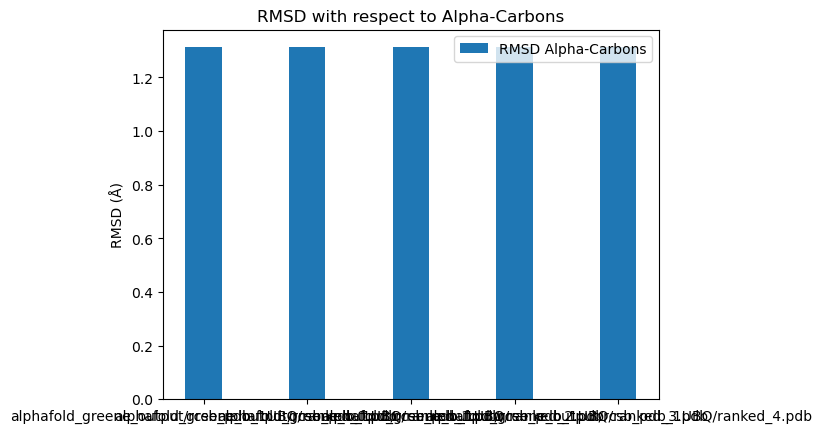

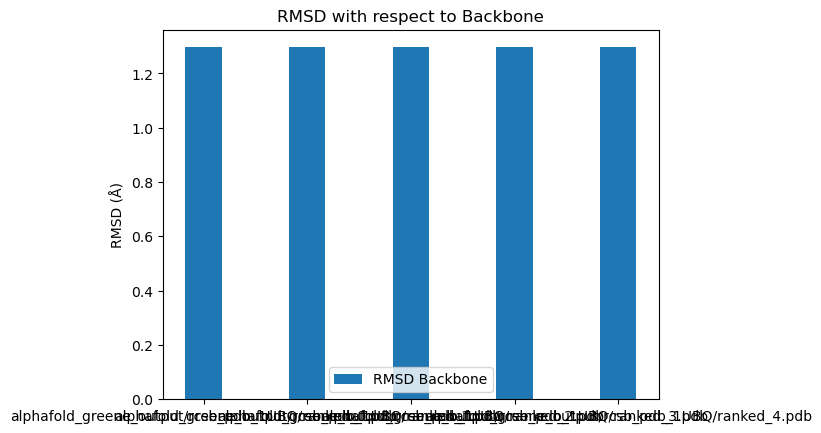

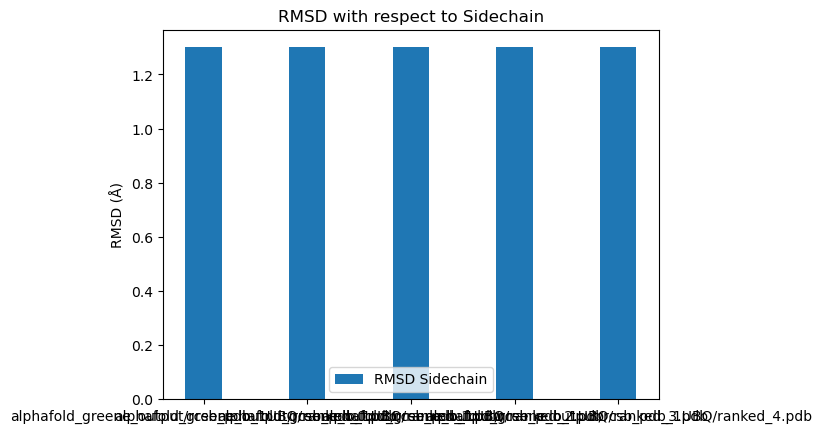

In [12]:
alpha_rmsd_list = []
backbone_rmsd_list = []
side_chain_rmsd_list = []

ref_traj = md.load("Input/1ubq.pdb") 
structure_paths=["alphafold_greene_output/rcsb_pdb_1UBQ/ranked_0.pdb", 
                   "alphafold_greene_output/rcsb_pdb_1UBQ/ranked_1.pdb",
                   "alphafold_greene_output/rcsb_pdb_1UBQ/ranked_2.pdb",
                   "alphafold_greene_output/rcsb_pdb_1UBQ/ranked_3.pdb",
                   "alphafold_greene_output/rcsb_pdb_1UBQ/ranked_4.pdb"]

alpha_indices = ref_traj.topology.select("name CA")
backbone_indices = ref_traj.topology.select("backbone")
sidechain_indices = ref_traj.topology.select("sidechain")

for pred_structure in structure_paths:
    # Load predicted structure
    pred_traj = md.load(pred_structure)

    # Align and calculate RMSD for alpha-carbons
    pred_traj.superpose(ref_traj, atom_indices=alpha_indices)
    rmsd_alpha = md.rmsd(pred_traj, ref_traj, atom_indices=alpha_indices)
    print(f"RMSD Alpha for {pred_structure}: {rmsd_alpha}")

    # Align and calculate RMSD for the full backbone
    pred_traj.superpose(ref_traj, atom_indices=backbone_indices)
    rmsd_backbone = md.rmsd(pred_traj, ref_traj, atom_indices=backbone_indices)
    print(f"RMSD Backbone for {pred_structure}: {rmsd_backbone}")

    # Align and calculate RMSD for side-chains
    pred_traj.superpose(ref_traj, atom_indices=sidechain_indices)
    rmsd_sidechain = md.rmsd(pred_traj, ref_traj, atom_indices=sidechain_indices)
    print(f"RMSD Sidechain for {pred_structure}: {rmsd_sidechain}")
    print()

fig, ax = plt.subplots()
bar_width = 0.35
bar_positions = np.arange(len(structure_paths))

ax.bar(bar_positions, rmsd_alpha, bar_width, label='RMSD Alpha-Carbons')
ax.set_xticks(bar_positions)
ax.set_xticklabels(structure_paths)
ax.set_ylabel('RMSD (Å)')
ax.set_title('RMSD with respect to Alpha-Carbons')
ax.legend()
plt.show()

fig, ax1 = plt.subplots()
bar_width = 0.35
bar_positions = np.arange(len(structure_paths))

ax1.bar(bar_positions, rmsd_backbone, bar_width, label='RMSD Backbone')
ax1.set_xticks(bar_positions)
ax1.set_xticklabels(structure_paths)
ax1.set_ylabel('RMSD (Å)')
ax1.set_title('RMSD with respect to Backbone')
ax1.legend()
plt.show()

fig, ax2= plt.subplots()
bar_width = 0.35
bar_positions = np.arange(len(structure_paths))

ax2.bar(bar_positions, rmsd_sidechain, bar_width, label='RMSD Sidechain')
ax2.set_xticks(bar_positions)
ax2.set_xticklabels(structure_paths)
ax2.set_ylabel('RMSD (Å)')
ax2.set_title('RMSD with respect to Sidechain')
ax2.legend()
plt.show()